In [107]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

In [108]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1

    return results


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0

    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [109]:
from keras import layers
from keras import Sequential


model = Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [110]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [111]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/9
16/16 [==============================] - 2s 62ms/step - loss: 2.8348 - accuracy: 0.4686 - val_loss: 1.9122 - val_accuracy: 0.6040
Epoch 2/9
16/16 [==============================] - 1s 32ms/step - loss: 1.6042 - accuracy: 0.6656 - val_loss: 1.4331 - val_accuracy: 0.6730
Epoch 3/9
16/16 [==============================] - 1s 32ms/step - loss: 1.2273 - accuracy: 0.7273 - val_loss: 1.2266 - val_accuracy: 0.7260
Epoch 4/9
16/16 [==============================] - 1s 31ms/step - loss: 1.0055 - accuracy: 0.7777 - val_loss: 1.1173 - val_accuracy: 0.7590
Epoch 5/9
16/16 [==============================] - 1s 37ms/step - loss: 0.8462 - accuracy: 0.8153 - val_loss: 1.0254 - val_accuracy: 0.7730
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.7099 - accuracy: 0.8479 - val_loss: 0.9650 - val_accuracy: 0.7890
Epoch 7/9
16/16 [==============================] - 1s 35ms/step - loss: 0.6006 - accuracy: 0.8722 - val_loss: 0.9868 - val_accuracy: 0.7850
Epoch 8/9
16/16 [===

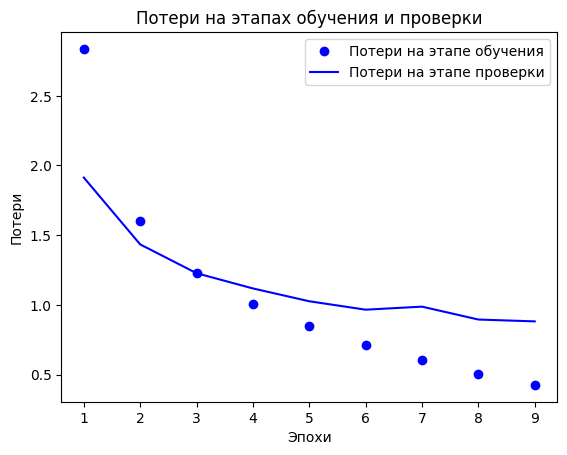

In [112]:
import matplotlib.pyplot as plt


loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")

plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")

plt.legend()

plt.show()

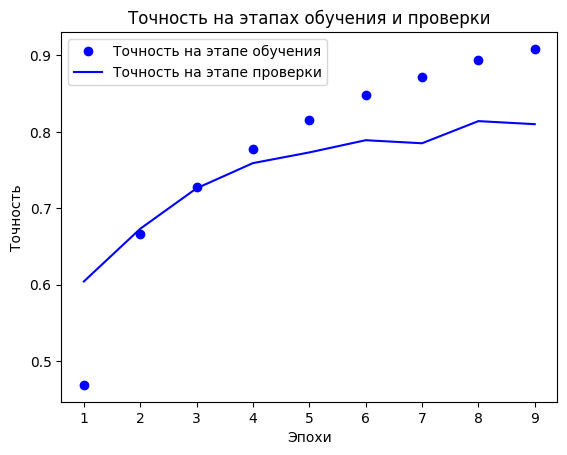

In [113]:
import matplotlib.pyplot as plt

plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_acc, "b", label="Точность на этапе проверки")

plt.title("Точность на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Точность")

plt.legend()

plt.show()